In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tasks.course_4.task_3_core import SOM

from setup import get_task_data

EPOCHS = 100

In [2]:
df = pd.read_csv(get_task_data('Iris.csv'))
df.sample(5)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
113,114,5.7,2.5,5.0,2.0,Iris-virginica
92,93,5.8,2.6,4.0,1.2,Iris-versicolor
71,72,6.1,2.8,4.0,1.3,Iris-versicolor
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
130,131,7.4,2.8,6.1,1.9,Iris-virginica


In [3]:
labels = df['Species']

df = df.drop(['Species', 'Id'], axis=1)
df = (df - df.min()) / (df.max() - df.min())
df['Species'] = labels

df.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
130,0.861111,0.333333,0.864407,0.750000,Iris-virginica
48,0.277778,0.708333,0.084746,0.041667,Iris-setosa
128,0.583333,0.333333,0.779661,0.833333,Iris-virginica
46,0.222222,0.750000,0.101695,0.041667,Iris-setosa
23,0.222222,0.541667,0.118644,0.166667,Iris-setosa


In [4]:
def plot_map(som, data):
    fig, ax = plt.subplots(figsize=(5, 5))

    class_styles = {
        'Iris-setosa' : 's',
        'Iris-versicolor': '*',
        'Iris-virginica': 'v',
    }

    for flower in class_styles:
        points_xs = data[data['Species'] == flower]['SepalLengthCm'].to_numpy()
        points_ys = data[data['Species'] == flower]['PetalLengthCm'].to_numpy()

        ax.scatter(points_xs, points_ys, marker=class_styles[flower])


    nodes = list(map(lambda n: list(n.position), som.nodes))
    nodes_xs = [x for x, _ in nodes]
    nodes_ys = [y for _, y in nodes]

    ax.scatter(nodes_xs, nodes_ys, color='black', s=3)

    for node in som.nodes:
        start_pos = list(node.position)
        for neighbor in node.neighbors:
            end_pos = list(neighbor.position)
            plt.plot(*np.transpose([start_pos, end_pos]), color='black')

    plt.show()

Kohonen map can be used as a clusterizer or as a non-linear analogue of PCA. 

It will be shown as a clusterizer on a subset of 2D data with visual representation and as a mapping on full 4D data of iris dataset and then analyzed in terms of mapping quality.  

In [5]:
subset_2d = df[['SepalLengthCm', 'PetalLengthCm', 'Species']]

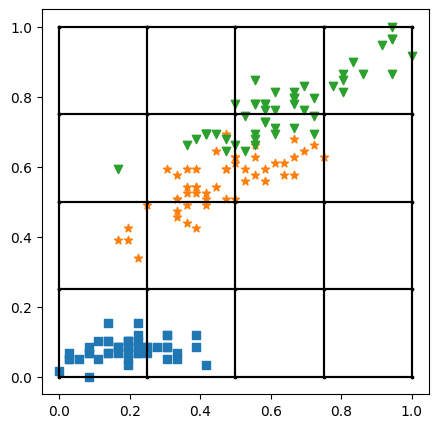

In [6]:
kohonen_map_2d = SOM((5, 5), 2, a0=0.025, s0=0.1)
plot_map(kohonen_map_2d, subset_2d)

In [7]:
input_data = subset_2d.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,PetalLengthCm
42,0.027778,0.050847
128,0.583333,0.779661
86,0.666667,0.627119
56,0.555556,0.627119
88,0.361111,0.525424


In [8]:
kohonen_map_2d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

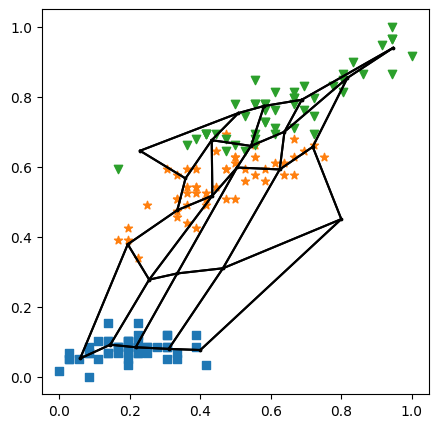

In [9]:
plot_map(kohonen_map_2d, subset_2d)

In [10]:
kohonen_map_2d.score()

Quantization error: 0.0021111796964287458
Topographic error: 0.1932


A quantization error of 0.0022 is relatively low, indicating that the SOM has done a good job in preserving the spatial relationships of the input data. Lower quantization errors generally suggest a more faithful representation of the input data.

A topographic error of 0.0 is ideal. It suggests that the SOM has preserved the topological relationships perfectly, meaning that neighboring inputs in the input space are also neighbors on the map.

Tuning for best shape:

In [11]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 2, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.019437939618594646
Topographic error: 0.0



3:
Quantization error: 0.007985958982154828
Topographic error: 0.0164



4:
Quantization error: 0.003253124326047687
Topographic error: 0.2538



5:
Quantization error: 0.0022241168728880704
Topographic error: 0.18146666666666667



6:
Quantization error: 0.0017933223481720769
Topographic error: 0.25566666666666665



7:
Quantization error: 0.0013790706988785072
Topographic error: 0.3576



8:
Quantization error: 0.0011498437508323175
Topographic error: 0.2644



9:
Quantization error: 0.0009952272491580954
Topographic error: 0.1934



10:
Quantization error: 0.0008151974962342049
Topographic error: 0.25106666666666666





As the map size increases (x from 2 to 10), the quantization error generally decreases.
The quantization error is a measure of how well the SOM represents the input data. A lower quantization error is equal to a better representation.
The topographic error remains consistently 0.0, suggesting that the spatial relationships in the input data are well preserved in the map for all tested sizes.

Smaller map sizes (e.g., 2x2) result in higher quantization errors, indicating that the map might not capture the input data's complexity.
As the map size increases, the quantization error decreases, suggesting that a larger map can better represent the input data.
However, it's crucial to keep balance, as very large maps might lead to overfitting or computational inefficiency.

Based on the results, in our case the best size for us would be either 7x7 or 8x8. It provides a good balance between capturing the input data's structure (low quantization error) and computational efficiency.

Tuning for best learning rate

Learning Rate (0.025):
Quantization error: 0.0012164210320554831
Topographic error: 0.18586666666666668



Learning Rate (0.0025):
Quantization error: 0.0017130997785994818
Topographic error: 0.12026666666666666



Learning Rate (0.03):
Quantization error: 0.001145981825693965
Topographic error: 0.22793333333333332



Learning Rate (0.05):
Quantization error: 0.0010690152380374008
Topographic error: 0.22706666666666667



Learning Rate (0.1):
Quantization error: 0.0010601169055051722
Topographic error: 0.20853333333333332



Learning Rate (0.5):
Quantization error: 0.0012384603593600903
Topographic error: 0.25433333333333336





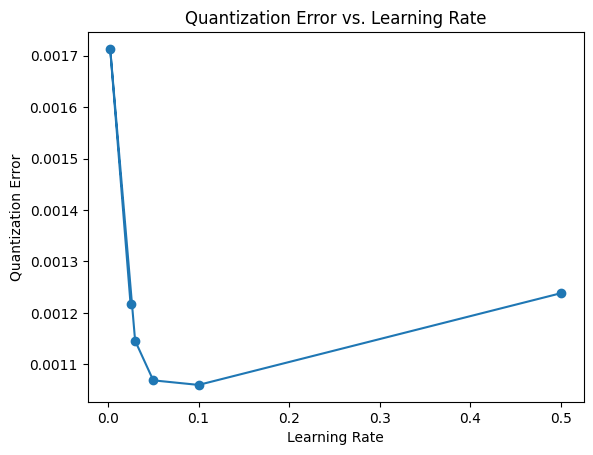

In [12]:
learning_rates = [0.025, 0.0025, 0.03, 0.05, 0.1, 0.5]
quantization_errors = []

for x in learning_rates:
    kohonen_map = SOM((8, 8), 2, a0=x, s0=0.5 / 8)  
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    quantization_error = kohonen_map.quantization_error()
    quantization_errors.append(quantization_error)

    print(f'Learning Rate ({x}):')
    kohonen_map.score()
    print('\n\n')

plt.plot(learning_rates, quantization_errors, marker='o')
plt.title('Quantization Error vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Quantization Error')
plt.show()

As we can see, picking size of map as 8x8, we found the local minimum for learning rate, its near 0.04-0.1 (an elbow of this chart).
Summarizing, both size of SOM and learning rate have significant impact on model's performance.

Mapping 4D:

In [13]:
kohonen_map_4d = SOM((5, 5), 4, a0=0.025 , s0=0.1)

In [14]:
input_data = df.drop('Species', axis=1)
input_data.sample(5)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
131,1.000000,0.750000,0.915254,0.791667
15,0.388889,1.000000,0.084746,0.125000
95,0.388889,0.416667,0.542373,0.458333
128,0.583333,0.333333,0.779661,0.833333
23,0.222222,0.541667,0.118644,0.166667


In [15]:
kohonen_map_4d.train(input_data.to_numpy(), len(input_data) * EPOCHS)

In [16]:
kohonen_map_4d.score()

Quantization error: 0.01631256443736449
Topographic error: 0.21426666666666666


Tuning for best shape:

In [17]:
for x in range(2, 11):
    kohonen_map = SOM((x, x), 4, a0=0.025, s0=0.5 / x)
    kohonen_map.train(input_data.to_numpy(), len(input_data) * EPOCHS)
    
    print(f'{x}:')
    kohonen_map.score()
    print('\n\n')

2:
Quantization error: 0.08430029473498747
Topographic error: 0.08533333333333333



3:
Quantization error: 0.04594057645549142
Topographic error: 0.8680666666666667



4:
Quantization error: 0.023783621922488184
Topographic error: 0.35473333333333334



5:
Quantization error: 0.0169438087358049
Topographic error: 0.231



6:
Quantization error: 0.014770950551022897
Topographic error: 0.19386666666666666



7:
Quantization error: 0.012822339071055873
Topographic error: 0.12733333333333333



8:
Quantization error: 0.011752962963409039
Topographic error: 0.12406666666666667



9:
Quantization error: 0.011179731094078592
Topographic error: 0.13106666666666666



10:
Quantization error: 0.0108692120285608
Topographic error: 0.12193333333333334



